In [1]:
from sklearn.datasets._samples_generator import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

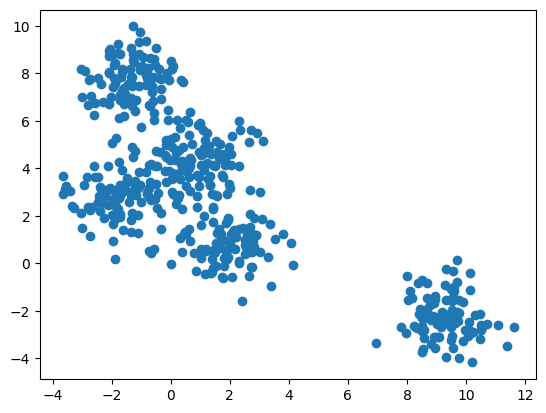

In [2]:
X, y = make_blobs(n_samples=500, centers=5, random_state=0, cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1])

Tìm số lượng cụm theo thuật toán Elbow

In [3]:
from scipy.spatial.distance import cdist

In [4]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
d2centers = cdist(X, kmeans.cluster_centers_, "euclidean")
d2centers

array([[ 8.67036956,  6.88686324,  3.7117448 ],
       [ 3.15642946, 11.41717868,  1.94045952],
       [ 3.8049668 , 10.49827803,  3.7147086 ],
       ...,
       [ 5.48965657, 13.38804785,  3.70060578],
       [ 4.94015758, 12.27821267,  2.4406501 ],
       [ 4.70159312,  9.64130854,  3.81928074]])

In [5]:
min_distances = np.min(d2centers, axis=1)

In [6]:
np.power(min_distances, 2)

array([1.37770495e+01, 3.76538315e+00, 1.37990600e+01, 4.61015507e+00,
       4.67138123e-01, 5.45415709e-02, 2.92838464e+00, 4.76405284e-01,
       3.73985035e+00, 2.46771414e+00, 3.13149896e+00, 8.31790350e+00,
       2.30525805e+00, 1.93993023e+00, 2.50795236e+00, 4.94874081e-01,
       7.83440326e-01, 2.88572955e+00, 1.22389384e+00, 1.15865456e+01,
       6.94663857e+00, 9.76172304e-01, 4.34501336e+00, 1.67653601e+00,
       9.06131536e+00, 1.33448810e+00, 1.07087657e+00, 6.97130780e+00,
       1.87653066e+00, 1.02893144e+01, 2.76923561e+00, 5.87722676e+00,
       1.52460123e+00, 3.10427788e+00, 2.43066145e+00, 5.26163522e+00,
       3.15013400e+00, 7.50895561e-01, 2.20919763e-01, 4.87435528e-01,
       3.07639939e+00, 1.39160071e+00, 2.73379652e+00, 5.22167630e+00,
       8.33340246e+00, 2.47444917e-02, 1.23842079e+00, 1.68496975e+00,
       7.73161618e+00, 1.12032654e-01, 5.43172753e+00, 2.62182944e-01,
       9.61159725e+00, 2.06406168e+01, 3.17037878e+00, 1.58414656e+00,
      

[14239.377266603544, 4221.284255598436, 2037.2359910214786, 1199.52646302725, 738.0030883964528, 675.155026169584, 618.3477767269756, 556.1120617956838, 501.6496789370599, 447.6544360021889]


Text(0, 0.5, 'SSE - Sum of Square Error')

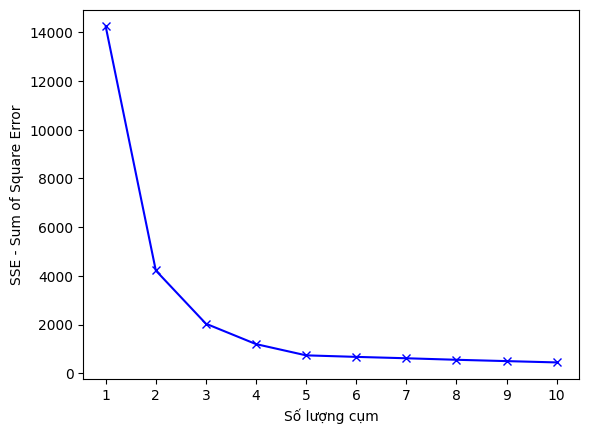

In [7]:
K = 10
elbows = []
for i in range(1, K + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    d2centers = cdist(X, kmeans.cluster_centers_, "euclidean")
    min_distances = np.min(d2centers, axis=1)
    d2_distances = np.power(min_distances, 2)
    sum_d2_distances = np.sum(d2_distances)
    elbows.append(sum_d2_distances)

print(elbows)

plt.plot(range(1, K + 1), elbows, "bx-")
plt.xticks(range(1, K + 1))
plt.xlabel("Số lượng cụm")
plt.ylabel("SSE - Sum of Square Error")

Xác định Elbow theo thư viện sklearn (KMeans)

Text(0, 0.5, 'SSE')

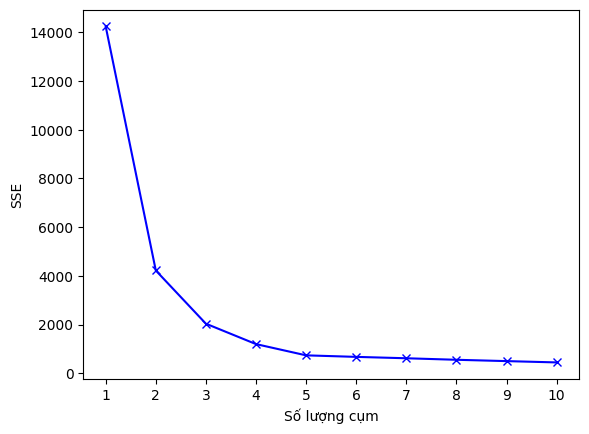

In [8]:
K = 10
elbows = []
for i in range(1, K + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    elbows.append(kmeans.inertia_)

plt.plot(range(1, K + 1), elbows, "bx-")
plt.xticks(range(1, K + 1))
plt.xlabel("Số lượng cụm")
plt.ylabel("SSE")